In [289]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [292]:
df.shape

(1599, 12)

In [293]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [294]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

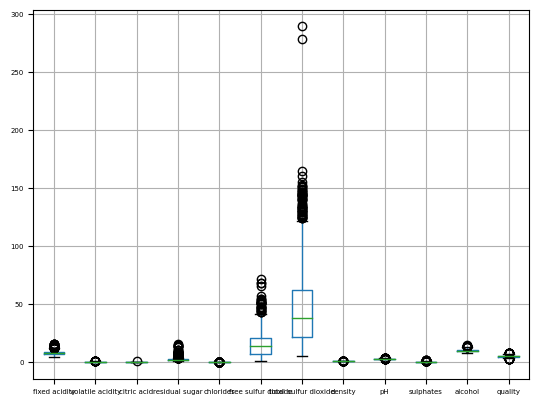

In [295]:
df.boxplot(fontsize=5)
plt.show()

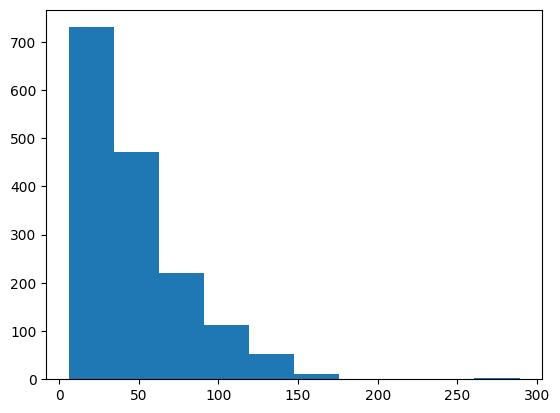

In [296]:
plt.hist(df['total sulfur dioxide'])
plt.show()

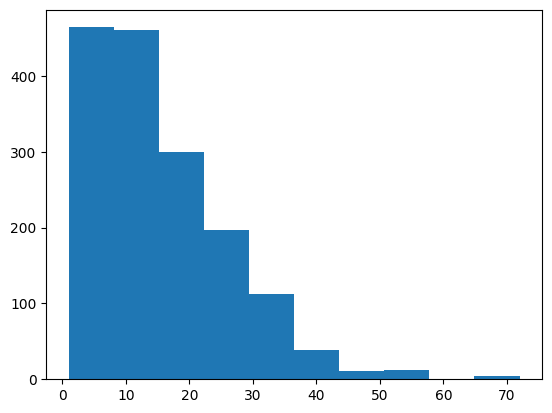

In [297]:
plt.hist(df['free sulfur dioxide'])
plt.show()

- Trying to remove outliers

In [298]:
l=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in l:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

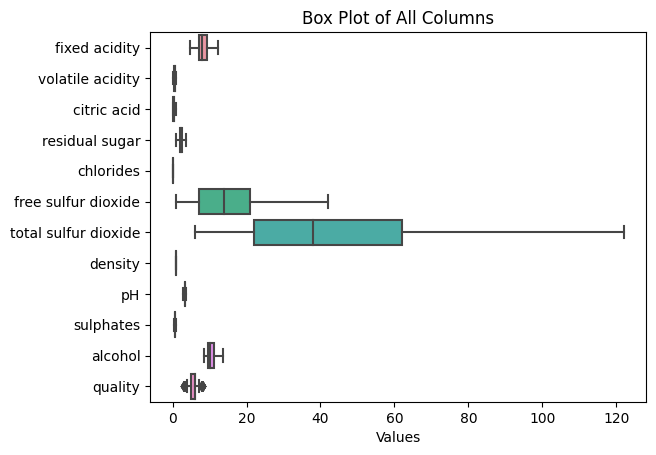

In [299]:
sns.boxplot(data=df, orient='h') 

plt.xlabel('Values')
plt.title('Box Plot of All Columns')
plt.show()

In [300]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,5.636023
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,8.000000


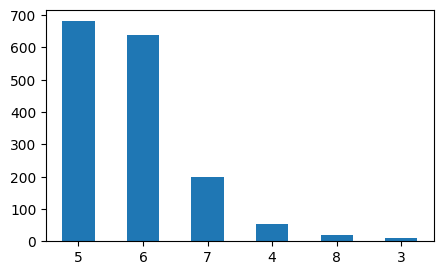

In [301]:
plt.figure(figsize=(5,3))
df["quality"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [302]:
df.head()
X = np.array(df.drop(['quality'], axis=1, inplace=False))
y = np.array(df['quality'])
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [304]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [305]:
lr.score(X_test, y_test)

0.540625

In [306]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.042566
0:	learn: 0.7961285	total: 1.75ms	remaining: 1.75s
1:	learn: 0.7857843	total: 2.81ms	remaining: 1.4s
2:	learn: 0.7769417	total: 3.55ms	remaining: 1.18s
3:	learn: 0.7684446	total: 4.27ms	remaining: 1.06s
4:	learn: 0.7597277	total: 5.31ms	remaining: 1.06s
5:	learn: 0.7517250	total: 6.09ms	remaining: 1.01s
6:	learn: 0.7435546	total: 6.8ms	remaining: 965ms
7:	learn: 0.7350905	total: 7.55ms	remaining: 937ms
8:	learn: 0.7283220	total: 8.3ms	remaining: 914ms
9:	learn: 0.7228338	total: 9.05ms	remaining: 896ms
10:	learn: 0.7168206	total: 9.8ms	remaining: 881ms
11:	learn: 0.7104878	total: 10.5ms	remaining: 868ms
12:	learn: 0.7051538	total: 12.5ms	remaining: 949ms
13:	learn: 0.6990219	total: 14.9ms	remaining: 1.05s
14:	learn: 0.6932417	total: 15.7ms	remaining: 1.03s
15:	learn: 0.6881808	total: 16.5ms	remaining: 1.01s
16:	learn: 0.6839172	total: 22.9ms	remaining: 1.32s
17:	learn: 0.6794440	total: 23.9ms	remaining: 1.3s
18:	learn: 0.6746400	total: 24.6ms	remaining: 1.2

In [307]:
catboost.score(X_test, y_test)

0.5416018015925693

In [308]:
svc = SVC()
svc.fit(X_train, y_train)


SVC()

In [309]:
svc.score(X_test, y_test)

0.509375

In [310]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [311]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

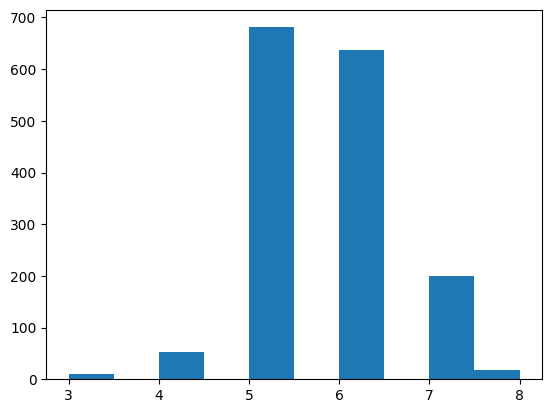

In [312]:
plt.hist(df['quality'])
plt.show()

In [313]:
def qualityFix(quality):
    if quality < 5:
        return 1
    elif quality >= 5:
        return 2
    return 3
df['quality'] = df['quality'].apply(qualityFix)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [314]:
X = np.array(df.drop(['quality'], axis=1, inplace=False))
y = np.array(df['quality'])

In [315]:
tree = DecisionTreeClassifier(
    max_depth=4,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [316]:
tree.score(X_test, y_test)

0.959375

In [317]:
y_pred = tree.predict(X_test)

In [319]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(y_test, y_pred)
cf

array([[  1,  10],
       [  3, 306]])

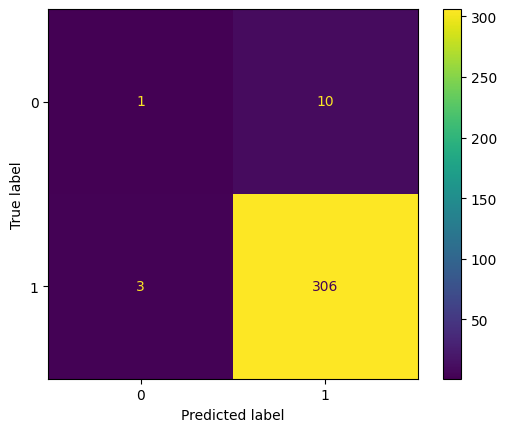

In [323]:
ConfusionMatrixDisplay(confusion_matrix=cf)
plt.show()

In [325]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.09      0.13        11
           2       0.97      0.99      0.98       309

    accuracy                           0.96       320
   macro avg       0.61      0.54      0.56       320
weighted avg       0.94      0.96      0.95       320

